### Please have a look at the 'Readme.txt' file before proceeding further

## Prerequisites

In [570]:
pwd


'C:\\Users\\Hashim\\Desktop\\Project'

In [571]:
import os

%cd C:/Users/Hashim/Desktop/Project

C:\Users\Hashim\Desktop\Project


# Import Libraries

In [572]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Import Data frames and check the columns

In [573]:
data = pd.read_excel('Base_Problem_DataSet.xlsb', engine='pyxlsb')

In [574]:
print(data.columns)

Index(['ID', 'Patron_Salary', 'Automobile_Possession', 'Two-Wheeler_Ownership',
       'Ongoing_Borrowing', 'Residence_Proprietorship', 'Offspring_Number',
       'Loan_Capital', 'Borrowing_Periodic_Payment',
       'Customer_Revenue_Category', 'Patron_Academic_Qualification',
       'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days',
       'Private_Dwelling_Duration', 'Cellphone_Marker',
       'Residential_Phone_Marker', 'Employment_Phone_Operation',
       'Customer_Vocation', 'Patron_Kin_Count', 'Customer_Urban_Area_Ranking',
       'Request_Submission_Day', 'Request_Submission_Hour',
       'Patron_Constant_Correspondence_Marker',
       'Customer_Professional_Communication_Marker', 'Sort_of_Institution',
       'Rating_Origin_1', 'Rating_Origin_2', 'Rating_Origin_3',
       '

Two columns in the dataset - 'Request_Submission_Day', 'Request_Submission_Hour' are irrelevant to tha fact that n identity is going to default or not.
Hence we are dropping these two columns.

In [575]:
data = data.drop(columns=['Request_Submission_Day', 'Request_Submission_Hour',])

In [576]:
print(data.shape)

(121856, 37)


So, now we have 37 columns and 121856 rows of data.
We will now check for missing values before moving on to EDA

# Data Cleaning

Checking for missing values

In [577]:
# define a function that has one arguement as dataframe
def missing_values_summary(df):
    # Calculate the total number of missing values per column
    missing_counts = df.isnull().sum()

    # Calculate the percentage of missing values per column
    missing_percentages = (missing_counts / len(df)) * 100

    # Create a summary DataFrame with columns and their missing value percentages
    summary_df = pd.DataFrame({'Columns': df.columns, 'Percentage': missing_percentages})
    summary_df.reset_index(drop=True, inplace=True)

    # return the dataframe we created
    return summary_df

In [578]:
missing_data = missing_values_summary(data)

In [579]:
missing_data.sort_values('Percentage', ascending = False)

,Columns,Percentage
20,Private_Dwelling_Duration,65.729221
30,Rating_Origin_1,56.488806
33,Community_Non-Payment_Incidence,50.820641
24,Customer_Vocation,34.003250
32,Rating_Origin_3,22.092470
35,Solvency_Information_Agency,15.214680
19,Identity_Age_in_Days,4.897584
31,Rating_Origin_2,4.666163
15,Population_Fraction_by_Region,3.985852
8,Borrowing_Periodic_Payment,3.948923


## Insights

Columns having missing values >10% should be dropped. 
On the other hand, few columns have importance in predicting defaulters.

Here is the description of columns with >10% missing values :-

i) Private_Dwelling_Duration - While it could provide some insights into the stability of an applicant's living situation, it's not typically considered one of the most critical factors in predicting loan default.

ii) Community_Non-Payment_Incidence	- While it may provide some contextual information about the community where an applicant resides, it's likely not as directly related to an individual's creditworthiness as other factors.

iii) Customer_Vocation - This column is highly useful, so we will be keeping this one.

iv) Solvency_Information_Agency - The agency providing solvency information can be valuable in assessing an applicant's creditworthiness. However, its importance may not be as high as other factors.

v) Rating_Origin_1 and Rating_Origin_3 - These columns likely refers to the sources or origin of a credit rating or credit score for the loan applicant. But because we have Rating_Origin_2 with less than 10% of missing values so we will keep only one and remove other two.

In [580]:
data.drop(['Private_Dwelling_Duration', 'Community_Non-Payment_Incidence', 'Rating_Origin_1', 'Customer_Vocation', 'Rating_Origin_3', 'Solvency_Information_Agency'], axis=1, inplace=True)

In [581]:
#Now we will remove missing values from those columns that have <2% of missing values
data.dropna(subset=['Customer_Urban_Area_Ranking','Patron_Kin_Count', 'Patron_Sex',], inplace=True)

While looking at the data I came across this column, it had same values in many rows, so I had to count it

In [582]:
data['Work_Duration_in_Days'] = pd.to_numeric(data['Work_Duration_in_Days'], errors='coerce')
illogical_value_count = data['Work_Duration_in_Days'].value_counts()
print(illogical_value_count)

Work_Duration_in_Days
365243.0    19898
381.0          67
212.0          62
230.0          61
199.0          56
            ...  
6866.0          1
10229.0         1
10952.0         1
13575.0         1
11796.0         1
Name: count, Length: 9819, dtype: int64


Because this column has a lot of garbage value, we have to remove this column from the dataset

In [583]:
data.drop(['Work_Duration_in_Days'], axis=1, inplace=True)

Let us compare the number of rows and columns before and after removing missing values

In [584]:
print(data.shape)

(114770, 30)


So this is the number of rows and columns before and after dropping missing values :- 

Before - 121856 rows, 37 columns

After - 114770 rows, 30 columns

### Outlier Analysis

In [585]:
import pandas as pd
import numpy as np

def detect_outliers_summary(df):
    # Initialize an empty list to store the results
    results = []

    # Loop through columns in the DataFrame
    for column in df.columns:
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calculate the first quartile (Q1) and third quartile (Q3) for the column
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)

            # Calculate the interquartile range (IQR) for the column
            IQR = Q3 - Q1

            # Calculate lower and upper bounds for outliers detection
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count the number of outliers in the column
            outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

            # Calculate the percentage of outliers in the column
            total_rows = len(df)
            percentage_outliers = (outliers_count / total_rows) * 100

            # Append the results to the list
            results.append({'Column': column, 'Percentage_of_Outliers': percentage_outliers})

    # Convert the list of results into a DataFrame
    summary_df = pd.DataFrame(results)

    return summary_df

In [586]:
outlier = detect_outliers_summary(data)

In [587]:
outlier.sort_values('Percentage_of_Outliers', ascending = False)

,Column,Percentage_of_Outliers
10,Customer_Urban_Area_Ranking,25.514507
7,Residential_Phone_Marker,20.057506
13,Default,8.073538
5,Offspring_Number,1.373181
9,Patron_Kin_Count,1.328744
12,Telecommunication_Switch,0.142023
11,Rating_Origin_2,0.005228
6,Cellphone_Marker,0.000871
0,ID,0.000000
1,Automobile_Possession,0.000000


Both the columns that have outliers more that 10% are almost irrelevant when it comes to predicting default rate.

So we will drop both the columns.


In [588]:
data.drop(['Customer_Urban_Area_Ranking', 'Residential_Phone_Marker'], axis=1, inplace=True)

In [589]:
print(data.shape)

(114770, 28)


Now we have only 29 columns.
Now we will analyze the importances of various columns and determin which columns will be kept for modelling.

### We will check for those features that have only one value in the dataset.

In [590]:
def calculate_repetition_percentage(df):
    # Initialize an empty list to store the results
    results = []

    # Loop through columns in the DataFrame
    for column in df.columns:
        # Get the counts of each distinct value in the column
        value_counts = df[column].value_counts()

        # Calculate the percentage of repetition for each value
        total_values = len(df[column])
        repetition_percentages = (value_counts / total_values) * 100

        # Create a DataFrame with the results for this column
        column_results = pd.DataFrame({
            'Column': [column] * len(value_counts),
            'Value': value_counts.index,
            'Percentage_of_Repetition': repetition_percentages.values
        })

        # Append the results for this column to the list
        results.append(column_results)

    # Concatenate the list of results into a final result DataFrame
    result_df = pd.concat(results, ignore_index=True)
    
    # Sort the result by Percentage_of_Repetition in descending order
    result_df = result_df.sort_values(by='Percentage_of_Repetition', ascending=False)

    # Filter and display values with a percentage greater than 80
    filtered_result = result_df[result_df['Percentage_of_Repetition'] > 90]

    return filtered_result

In [591]:
repetition = calculate_repetition_percentage(data)

In [592]:
repetition

,Column,Value,Percentage_of_Repetition
167862,Cellphone_Marker,1,99.999129
167881,Patron_Constant_Correspondence_Marker,Yes,92.280213
236288,Default,0,91.926462


The feature called 'Cellphone_Marker' has 1 throughout the data set, hence it is of no use.

In [593]:
data.drop(['Cellphone_Marker'], axis=1, inplace=True)

In [594]:
data.shape

(114770, 27)

### Value wise defaulter in each feature

In [595]:
def value_wise_defaulter_percentage(df, col):
    result_data = []

    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df['Default'] == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        percentage_default = (default_cnt * 100 / total_cnt) if total_cnt > 0 else 0
        result_data.append({'Value': value, 'Percentage of Defaulter': percentage_default})

    result_df = pd.DataFrame(result_data).sort_values(by='Percentage of Defaulter', ascending=False)
    
    return result_df

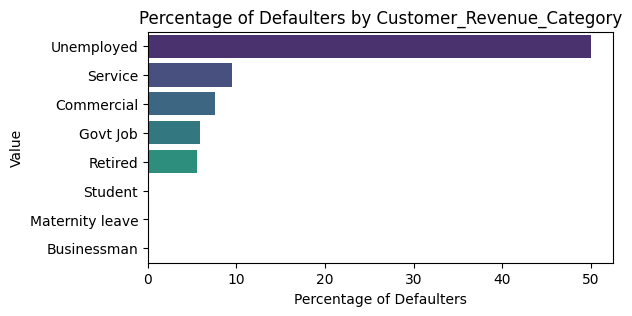

In [596]:
Customer_Revenue_Category = value_wise_defaulter_percentage(data, 'Customer_Revenue_Category')

# Plotting a Seaborn bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Percentage of Defaulter', y='Value', data=Customer_Revenue_Category, palette='viridis')
plt.xlabel('Percentage of Defaulters')
plt.ylabel('Value')
plt.title(f'Percentage of Defaulters by Customer_Revenue_Category')
plt.show()

### Insights

It can be clearly seen that people that are unemplyed are most likely to be defaulter

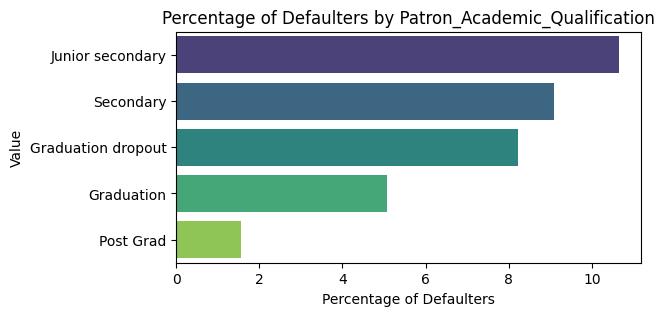

In [597]:
Patron_Academic_Qualification = value_wise_defaulter_percentage(data, 'Patron_Academic_Qualification')

# Plotting a Seaborn bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Percentage of Defaulter', y='Value', data=Patron_Academic_Qualification, palette='viridis')
plt.xlabel('Percentage of Defaulters')
plt.ylabel('Value')
plt.title(f'Percentage of Defaulters by Patron_Academic_Qualification')
plt.show()

### Insights

No major inferece can be drawn but we can see that people that have attended till junior secondary are much likely to be defaulters

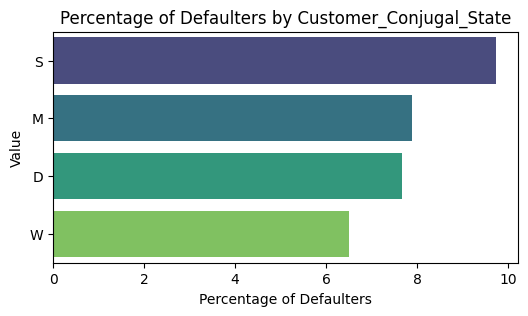

In [598]:
Customer_Conjugal_State = value_wise_defaulter_percentage(data, 'Customer_Conjugal_State')

# Plotting a Seaborn bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Percentage of Defaulter', y='Value', data=Customer_Conjugal_State, palette='viridis')
plt.xlabel('Percentage of Defaulters')
plt.ylabel('Value')
plt.title(f'Percentage of Defaulters by Customer_Conjugal_State')
plt.show()

### Insights

Conjugal state basically means Marital status, from the graph we can see that Single (S) people are more likely to be defaulters

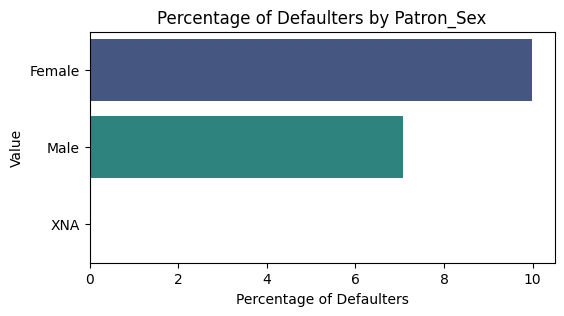

In [599]:
Patron_Sex = value_wise_defaulter_percentage(data, 'Patron_Sex')

# Plotting a Seaborn bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Percentage of Defaulter', y='Value', data=Patron_Sex, palette='viridis')
plt.xlabel('Percentage of Defaulters')
plt.ylabel('Value')
plt.title(f'Percentage of Defaulters by Patron_Sex')
plt.show()

### Insights

Clearly Females are more likely to be defaulter

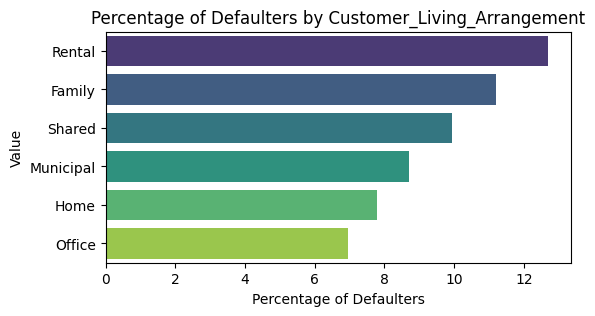

In [600]:
Customer_Living_Arrangement = value_wise_defaulter_percentage(data, 'Customer_Living_Arrangement')

# Plotting a Seaborn bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Percentage of Defaulter', y='Value', data=Customer_Living_Arrangement, palette='viridis')
plt.xlabel('Percentage of Defaulters')
plt.ylabel('Value')
plt.title(f'Percentage of Defaulters by Customer_Living_Arrangement')
plt.show()

### Insights

People who live in Rental are most likely to be defaulter.
People who live in offices are least likely to be defaulter.

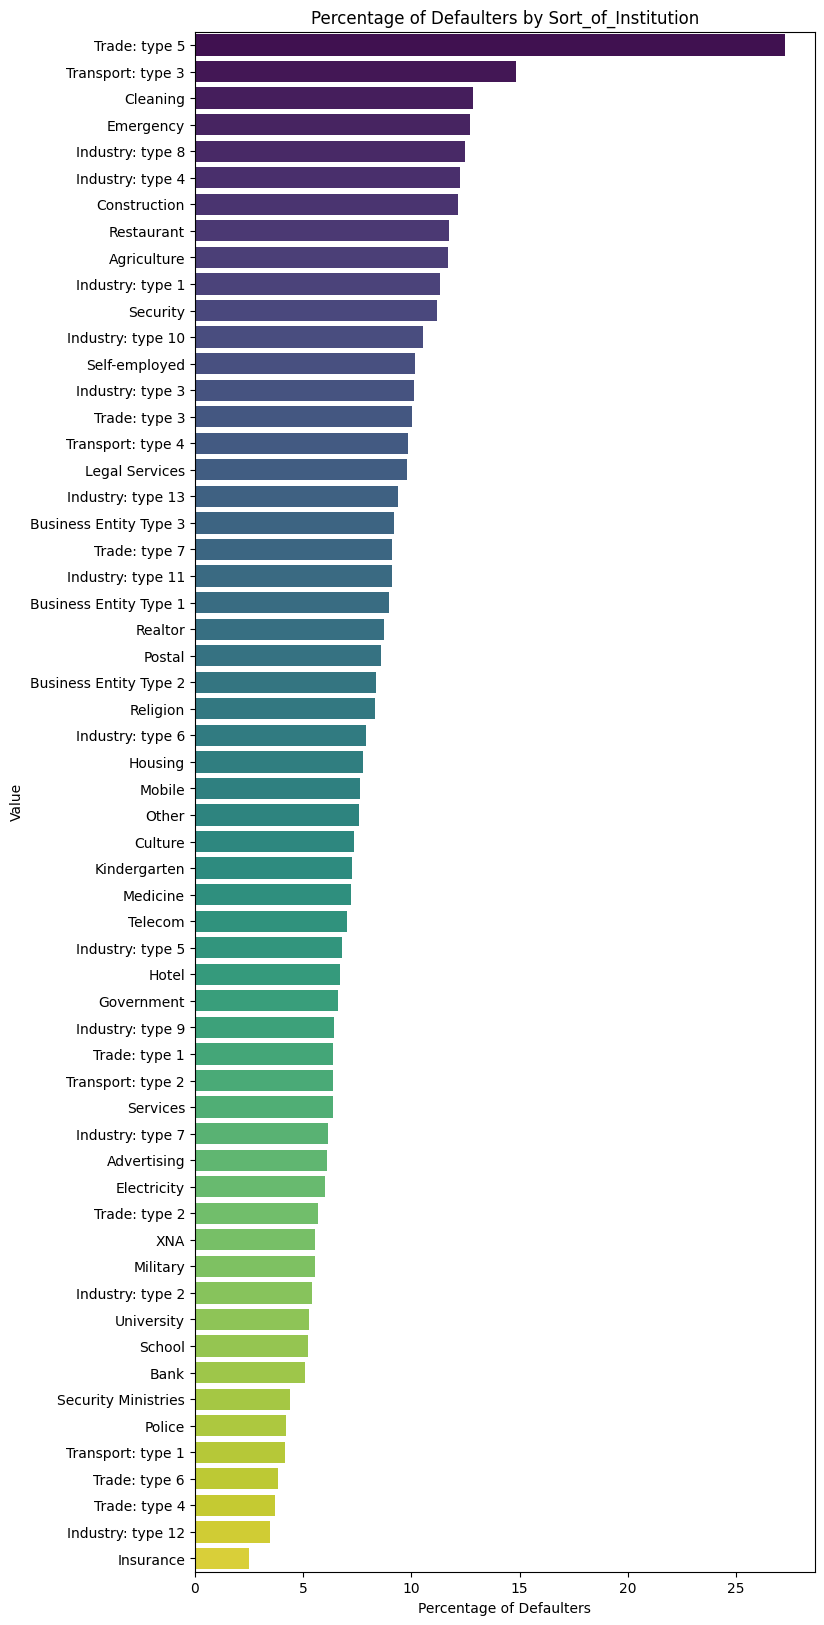

In [601]:
Sort_of_Institution = value_wise_defaulter_percentage(data, 'Sort_of_Institution')

# Plotting a Seaborn bar chart
plt.figure(figsize=(8, 20))
sns.barplot(x='Percentage of Defaulter', y='Value', data=Sort_of_Institution, palette='viridis')
plt.xlabel('Percentage of Defaulters')
plt.ylabel('Value')
plt.title(f'Percentage of Defaulters by Sort_of_Institution')
plt.show()

### Insights

Clearly Trade: type 5 is most likely to be defaulter than others

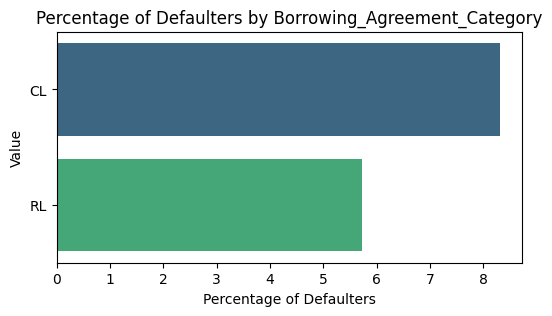

In [602]:
Borrowing_Agreement_Category = value_wise_defaulter_percentage(data, 'Borrowing_Agreement_Category')

# Plotting a Seaborn bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Percentage of Defaulter', y='Value', data=Borrowing_Agreement_Category, palette='viridis')
plt.xlabel('Percentage of Defaulters')
plt.ylabel('Value')
plt.title(f'Percentage of Defaulters by Borrowing_Agreement_Category')
plt.show()

### Insights

From the chart itself we can see that Revolving Loans (RL) are much more likely to be repaid than Credit Line (CL).
Reason for this might be because the borrower repays small amount from time to time.

# Feature Engineering and Model Selection

In [603]:
data

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Enlistment_Period_in_Days,Identity_Age_in_Days,Employment_Phone_Operation,Patron_Kin_Count,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_2,Telecommunication_Switch,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,6123,383,0,2.0,Yes,Yes,Self-employed,0.478787,63.0,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,7833,21,1,2.0,Yes,Yes,Government,0.215068,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,NaN,331,0,2.0,Yes,Yes,Self-employed,0.552795,277.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,NaN,775,0,2.0,Yes,Yes,XNA,0.135182,1700.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,5516,4043,0,4.0,Yes,Yes,Business Entity Type 3,0.301182,674.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,...,2661,2943,0,2.0,Yes,No,Business Entity Type 2,0.173527,0.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,...,902,1209,0,2.0,Yes,Yes,Self-employed,0.371559,4.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,...,3980,353,0,3.0,No,No,Trade: type 6,0.048079,0.0,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,...,895,2902,0,2.0,Yes,Yes,Business Entity Type 3,0.103538,0.0,0


We can see that there are diffrent types of data (nominal, ordinal, categorical, continous) available in this dataset. So we will try to encode categorical columns.


Also, we will use XG Boost algorithm because of the above stated reason.

### Find Unique value in categorical columns

In [604]:
print(data['Customer_Revenue_Category'].unique())
print(data['Patron_Academic_Qualification'].unique())
print(data['Customer_Conjugal_State'].unique())
print(data['Patron_Sex'].unique())
print(data['Borrowing_Agreement_Category'].unique())
print(data['Customer_Living_Arrangement'].unique())
print(data['Patron_Constant_Correspondence_Marker'].unique())
print(data['Customer_Professional_Communication_Marker'].unique())
print(data['Sort_of_Institution'].unique())
print(data['Default'].unique())

['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
['M' 'W' 'S' nan 'D']
['Male' 'Female' 'XNA']
['CL' 'RL' nan]
['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']
['Yes' 'No']
['Yes' 'No']
['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' nan
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Trade: type 3' 'Industry: type 2'
 'Trade: type 7' 'Trade: type 2' 'Agriculture' 'Military' 'Kindergarten'
 'Housing' 'Industry: type 1' 'Industry: type 11' 'Bank' 'School'
 'Industry: type 9' 'Medicine' 'Postal' 'University' 'Transport: type 2'
 'Restaurant' 'Electricity' 'Industry: type 4' 'Security Ministries'
 'Services' 'Transport: type 3' 'Police' 'Mobile' 'Hotel' 'Security'
 'Industry: type 7' 'Advertising' 'Cleaning' 'Realtor' 'Trade: type 6'
 'Culture' 'Industry: type

Here, we can see that 'Patron Sex' has XNA, which we will remove.

In [605]:
data['Patron_Sex'].value_counts()

Patron_Sex
Male      75396
Female    39371
XNA           3
Name: count, dtype: int64

In [606]:
valid_genders = ['Male', 'Female']

# Use the 'drop' method to filter rows with invalid genders
data = data.drop(data[~data['Patron_Sex'].isin(valid_genders)].index)

We have three columns that are provided in the number of days, these are 'Elderliness_in_Days', 'Work_Duration_in_Days' and 'Enlistment_Period_in_Days'. We will convert these into number of years.


In [607]:
# Convert columns to numeric and then divide by 365
columns_to_convert = ['Elderliness_in_Days', 'Enlistment_Period_in_Days']

data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
data[columns_to_convert] = data[columns_to_convert] / 365  # Perform division

We have two columns that dont have much value for predicting. These are 'Population_Fraction_by_Region', 'Identity_Age_in_Days', hence we will drop them

In [608]:
data.drop(['Population_Fraction_by_Region', 'Identity_Age_in_Days'], axis=1, inplace=True)

In [609]:
data.drop(['ID'], axis=1, inplace=True)

In [610]:
data.rename(columns = {'Two-Wheeler_Ownership':'Two_Wheeler_Ownership'}, inplace = True)

## Label Encoding

In [611]:
# Labelling DataSet

Customer_Revenue_Category_LABEL = {"Commercial":0, "Service":1, "Retired":2, "Govt Job":3, "Student":4, "Unemployed":5, "Maternity leave":6, "Businessman":7}
Patron_Academic_Qualification_LABEL = {"Secondary":0, "Graduation":1, "Graduation dropout":2, "Junior secondary":3, "Post Grad":4}
Customer_Conjugal_State_LABEL = {"M":0, "W":1, "S":2, "D":3}
Patron_Sex_LABEL = {"Male":0, "Female":1}
Borrowing_Agreement_Category_LABEL = {"CL":0, "RL":1 }
Customer_Living_Arrangement_LABEL = {"Home":0, "Family":1, "Office":2, "Municipal":3, "Rental":4, "Shared":5}
Patron_Constant_Correspondence_Marker_LABEL = {"Yes":0, "No":1}
Customer_Professional_Communication_Marker_LABEL = {"Yes":0, "No":1}
Sort_of_Institution_LABEL = {"Self-employed":0, "Government":1, "XNA":2, "Business Entity Type 3":3, "Other":4, "Industry: type 3":5, "Business Entity Type 2":6, "Business Entity Type 1":7,
 "Transport: type 4":8, "Construction":9, "Trade: type 3":10, "Industry: type 2":11, "Trade: type 7":12, "Trade: type 2":13,"Agriculture":14, "Military":15, "Kindergarten":16,
 "Housing":17, "Industry: type 1":18, "Industry: type 11":19, "Bank":20, "School":21, "Industry: type 9":22, "Medicine":23, "Postal":24, "University":25, "Transport: type 2":26,
 "Restaurant":27, "Electricity":28, "Industry: type 4":29, "Security Ministries":30, "Services":31, "Transport: type 3":32, "Police":33, "Mobile":34, "Hotel":35, "Security":36,
 "Industry: type 7":37, "Advertising":38, "Cleaning":39, "Realtor":40, "Trade: type 6":41, "Culture":42, "Industry: type 5":43, "Telecom":44, "Trade: type 1":45, "Industry: type 12":46,
 "Industry: type 8":47, "Insurance" "Emergency":48, "Legal Services":49, "Industry: type 10":50, "Trade: type 4":51, "Industry: type 6":52, "Industry: type 13":53, "Transport: type 1":54,
 "Religion":55, "Trade: type 5":56,}

In [612]:
# Mapping DATASET
data["Customer_Revenue_Category"] = data["Customer_Revenue_Category"].map(Customer_Revenue_Category_LABEL)
data["Patron_Academic_Qualification"] = data["Patron_Academic_Qualification"].map(Patron_Academic_Qualification_LABEL)
data["Customer_Conjugal_State"] = data["Customer_Conjugal_State"].map(Customer_Conjugal_State_LABEL)
data["Patron_Sex"] = data["Patron_Sex"].map(Patron_Sex_LABEL)
data["Borrowing_Agreement_Category"] = data["Borrowing_Agreement_Category"].map(Borrowing_Agreement_Category_LABEL)
data["Customer_Living_Arrangement"] = data["Customer_Living_Arrangement"].map(Customer_Living_Arrangement_LABEL)
data["Patron_Constant_Correspondence_Marker"] = data["Patron_Constant_Correspondence_Marker"].map(Patron_Constant_Correspondence_Marker_LABEL)
data["Customer_Professional_Communication_Marker"] = data["Customer_Professional_Communication_Marker"].map(Customer_Professional_Communication_Marker_LABEL)
data["Sort_of_Institution"] = data["Sort_of_Institution"].map(Sort_of_Institution_LABEL)

Now I will covert the rest of the columns from object datatype into numeric, so that XG  Boost could recognize them

In [613]:
data['Patron_Salary'] = pd.to_numeric(data['Patron_Salary'], errors='coerce')
data['Loan_Capital'] = pd.to_numeric(data['Loan_Capital'], errors='coerce')
data['Borrowing_Periodic_Payment'] = pd.to_numeric(data['Borrowing_Periodic_Payment'], errors='coerce')

Now that everything is done, we will apply the XG Boost Algorithm

## Applying Machine Learning (XG BOOST)

In [614]:
X = data.drop("Default", axis = 1)
y = data["Default"]

In [625]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

Note :- The hyperparameters used in fitting was taken from Randomized Search CV which is below this section.

Accuracy without any parameters was 0.9162237518515292

In [626]:
# Create and fit the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=43, subsample= 0.7999999999999999, n_estimators=800, max_depth= 8, learning_rate= 0.2, colsample_bytree= 0.7)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=43, ...)

In [627]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [628]:
# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9276814498562342


## Hyperparameter tuning using Randomized Search CV

In [619]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # The number of boosting rounds
    'max_depth': np.arange(3, 10, 1),          # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate
    'subsample': np.arange(0.7, 1.0, 0.1),    # Fraction of samples used for tree building
    'colsample_bytree': np.arange(0.7, 1.0, 0.1)  # Fraction of features used for tree building
}

In [620]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the randomized search
random_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

## Cross Validation

In [621]:
# from sklearn.model_selection import cross_val_score, KFold
# num_folds = 10
# # Create a KFold cross-validation object
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Perform cross-validation and calculate accuracy
# scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')

# # Print the accuracy scores for each fold
# for fold, score in enumerate(scores, start=1):
#     print(f'Fold {fold} Accuracy: {score:.5f}')

# # Calculate and print the average accuracy
# average_accuracy = scores.mean()
# print(f'Average Accuracy: {average_accuracy:.5f}')

Average Accurace did not improved well, so I will not make any changes in the model.
Commented this code to save run time

# Exporting PKL and CSV for stremlit application

In [629]:
# I am saving this into pickle file so that i could reuse it in my streamlit app, this way my streamlit app will be optimized
import pickle
# Save the model to a pickle file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

In [623]:
# I am also saving this cleaned data set so that i don't have to clean it again while building streamlit application
data.to_csv('cleaned_data.csv', index=False)

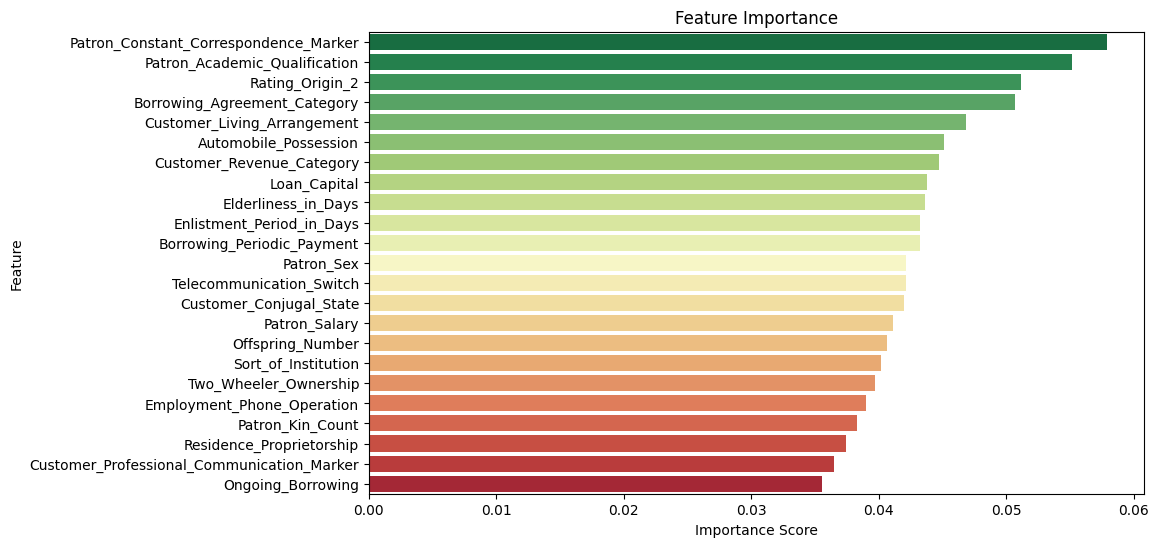

In [624]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores (optional)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette="RdYlGn_r")
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

For the streamlit application I will take top 7 features so that i could look clean and tidy. 

(Although I could add all of these but that will just mess the application)

# Prediction

In [631]:
import xgboost as xgb
# Create a sample input as a DataFrame
input_data = {
            'Patron_Salary':250000,
            'Automobile_Possession':1,
            'Two_Wheeler_Ownership':1,
            'Ongoing_Borrowing':1,
            'Residence_Proprietorship':1,
            'Offspring_Number':0,
            'Loan_Capital':2500, 
            'Borrowing_Periodic_Payment':2500, 
            'Customer_Revenue_Category':0,
            'Patron_Academic_Qualification':0,
            'Customer_Conjugal_State':0, 
            'Patron_Sex':0,
            'Borrowing_Agreement_Category':0,
            'Customer_Living_Arrangement':0, 
            'Elderliness_in_Days':0,  
            'Enlistment_Period_in_Days':0, 
            'Employment_Phone_Operation':0,
            'Patron_Kin_Count':0,  
            'Patron_Constant_Correspondence_Marker':0,
            'Customer_Professional_Communication_Marker':0,
            'Sort_of_Institution':0, 
            'Rating_Origin_2':0.7936,
            'Telecommunication_Switch':0,
}

sample_input = pd.DataFrame(input_data, index=[0])

In [655]:
predictions = xgb_model.predict(sample_input)

if predictions == 0:
    print("Prediction Class: Non-Defaulter")
else :
    print("Prediction Class: Defaulter")

prediction_proba = xgb_model.predict_proba(sample_input)
print("Risk Level : ", (prediction_proba[0][1])*100,"%")

Prediction Class: Non-Defaulter
Risk Level :  0.9274855256080627 %
